<a href="https://colab.research.google.com/github/PeterMamdouh678/Solar-Cell-Analysis/blob/main/Stability_Protocol_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/intepolated T80.csv')


In [ ]:
#Data Cleaning

#renaming the needed coloumns 
df.rename(columns={'Stability. Protocol [ISOS x/IEC x/ …] ' :'Stability_Protocol'\
                   ,'Stability. PCE. T80 [h]':'Stability_PCE'},inplace = True)

# Replace all missing or wrong values with Zero

df.fillna(0,inplace = True)

In [ ]:
df.columns

Index(['Ref. Publication date [year:mm:dd]', 'Substrate', 'Electrode',
       'TL1-front', 'TL2-front', 'TL3-front', 'Unnamed: 6', 'TL4-back',
       'TL5-back', 'TL6-back', 'TL7-back', 'Electrode2',
       'Cell. Area. Measured [cm^2]', 'Cell. Architecture [nip/pin/ …]',
       'Module [TRUE/FALSE]',
       'Perovskite. Composition. A-ions [Ion.1; Ion.2; … | Ion.3; … | ...]',
       'Perovskite. Composition. B-ions [Ion.1; Ion.2; … | Ion.3; … | ...]',
       'Perovskite. Composition. C-ions [Ion.1; Ion.2; … | Ion.3; … | ...]',
       'Perovskite. Composition. C-ions. Coefficients [Cof.1; Cof.2; … | Cof.3; … | ...]',
       'Perovskite. Additives. Compounds [Addt.1; Addt.2; ... | Addt.3; … | Addt.4 | ... ]',
       'Perovskite. Band gap [Eg.1 | Eg.2 | ...] [eV]',
       'Perovskite. Deposition. Number of deposition steps',
       'Perovskite. Deposition. Procedure [Proc. 1 >> Proc. 2 >> ... | Proc. 3 >> … | Proc. 4 | ... ]',
       'Perovskite. Deposition. Solvents [Sol.1; Sol.2 >> Sol

In [ ]:
df["Stability_Protocol"].unique()

array(['ISOS-D-1', 'ISOS-L-1', 'ISOS-D-2', 'ISOS-D-1I', 'ISOS-L-2',
       'ISOS‐D‐3', 'ISOS-D-2I', 'ISOS-D-3', 'ISOS-L-2I', 'ISOS-L-1I',
       'ISOS-L-3', 'ISOS‐L‐1', 'ISOS-T-1', 'IEC 61215', 'Bending test',
       'ISOS-O-1', 'UV-stability', 'ISOS-V-1I', 'ISOS-V-1', 'ISOS-LC-1',
       'ISOS-L-C1I', 'Indoor light', 'IEC 61646', 'ISOS-T-3'],
      dtype=object)

In [ ]:
#Seprating ISOS_D, ISOS_L, ISOS_T, ISOS_O, ISOS_V
            
ISOS_D = df[( df["Stability_Protocol"] == 'ISOS_D-1' ) | ( df["Stability_Protocol"] == 'ISOS-D-2' ) 
            | ( df["Stability_Protocol"] == 'ISOS-D-1I' ) | ( df["Stability_Protocol"] == 'ISOS-D-3' ) 
            | ( df["Stability_Protocol"] == 'ISOS-D-2I' ) ]

In [ ]:
ISOS_L = df[ (df["Stability_Protocol"]=='ISOS-L-1') | (df["Stability_Protocol"]=='ISOS-L-2') 
            | (df["Stability_Protocol"]=='ISOS-L-2I') | (df["Stability_Protocol"]=='ISOS-L-1I') 
            | (df["Stability_Protocol"]=='ISOS-L-3')]

In [ ]:

ISOS_T = df[ (df["Stability_Protocol"] == 'ISOS-T-1') | (df["Stability_Protocol"] == 'ISOS-T-3')]


In [ ]:
ISOS_O = df[ df["Stability_Protocol"] == 'ISOS-O-1' ]


In [ ]:
ISOS_V = df[( df["Stability_Protocol"] == 'ISOS-V-1I' ) | ( df["Stability_Protocol"] == 'ISOS-V-1' ) ]


In [ ]:
#Collecting only ISOS_D, ISOS_L, ISOS_O, ISOS_V and ISOS_T together again

ISOS_LD = ISOS_D.append(ISOS_L)
ISOS_LDO = ISOS_O.append(ISOS_LD)
ISOS_LDOT = ISOS_T.append(ISOS_LDO)
ISOS_LDOTV = ISOS_LDOT.append(ISOS_V)


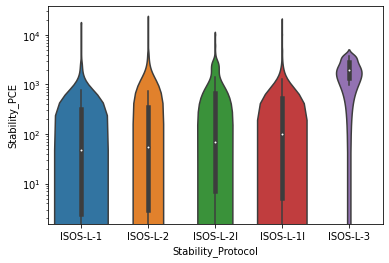

In [ ]:
#Violin plot for ISOS_L

plt.figure()
sns.violinplot(y="Stability_PCE",x="Stability_Protocol",data=ISOS_L,figsize=(30,30))
plt.yscale("log")
plt.show()

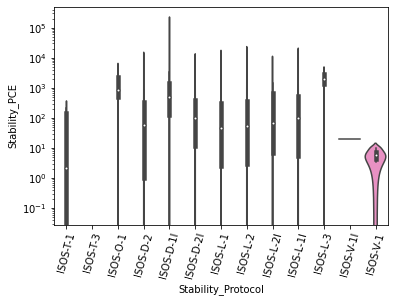

In [ ]:
plt.figure()
sns.violinplot(y="Stability_PCE",x="Stability_Protocol",data=ISOS_LDOTV,figsize=(60,60))
plt.yscale("log")
plt.xticks(rotation=75)
plt.show()